# Exploratory Data Analysis

1. Stock Market Index (Country, Index Name, Index Ticker)
2. Stock Market Index Composition (Index Shortname, Company Name, Company Ticker, Industry, Market Cap, Current Price, Avg. Annual Return)
3. Company (Company Ticker, Company’s Name, Company’s Address, Market Cap, )
4. Company Financial Statements (Company ticker, company’s name, year, Income Statement, Balance Sheets, Cash Flow)
5. Company Daily Stock Price (Last 1 year)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [5]:
# Data
stock_market_index = pd.read_csv('../data/stock_market_index.csv')
index_compositions = pd.read_csv('../data/index_compositions.csv')
company_details = pd.read_csv('../data/company_details.csv')
financial_statements = pd.read_csv('../data/financial_statements.csv')
daily_stock_price = pd.read_csv('../data/daily_stock_price.csv')

In [6]:
stock_market_index

,Country,Index_Name,Index_Shortname,Index_Ticker
0,France,Cotation Assistee en Continu,CAC 40,FCHI
1,Germany,Deutscher Aktienindex,DAX 40,GDAXI
2,Spain,Indice Bursatil Espanol,IBEX 35,IBEX


In [9]:
index_compositions

,Index_Shortname,Ticker,Company_Name,Industry,Market_Cap,Current_Price,Avg_Annual_Return
0,CAC 40,AC.PA,Accor SA,Lodging,9.856987e+09,40.46,4.21
1,CAC 40,ACA.PA,Credit Agricole S.A.,Banks - Regional,4.190949e+10,13.81,10.80
2,CAC 40,AI.PA,L'Air Liquide S.A.,Specialty Chemicals,9.850420e+10,170.78,13.20
3,CAC 40,AIR.PA,Airbus SE,Aerospace & Defense,1.049240e+11,132.92,3.61
4,CAC 40,BN.PA,Danone S.A.,Packaged Foods,4.181815e+10,64.92,2.34
...,...,...,...,...,...,...,...
110,IBEX 35,SAN.MC,"Banco Santander, S.A.",Banks - Diversified,7.031408e+10,4.57,10.56
111,IBEX 35,SCYR.MC,"Sacyr, S.A.",Engineering & Construction,2.479955e+09,3.27,11.37
112,IBEX 35,SLR.MC,"Solaria Energa y Medio Ambiente, S.A.",Utilities - Renewable,1.474422e+09,11.80,38.44
113,IBEX 35,TEF.MC,"Telefnica, S.A.",Telecom Services,2.481319e+10,4.40,4.70


In [54]:
index_compositions[index_compositions["Index_Shortname"]=="CAC 40"].sort_values(by="Market_Cap", ascending=False).head()

,Index_Shortname,Ticker,Company_Name,Industry,Market_Cap,Current_Price,Avg_Annual_Return
20,CAC 40,MC.PA,"LVMH Mot Hennessy - Louis Vuitton, Societe Eur...",Luxury Goods,3.260086e+11,653.10,12.64
27,CAC 40,RMS.PA,Hermes International Societe en commandite par...,Luxury Goods,2.235103e+11,2132.00,29.72
23,CAC 40,OR.PA,L'Oreal S.A.,Household & Personal Products,2.106008e+11,394.60,12.80
36,CAC 40,TTE.PA,TotalEnergies SE,Oil & Gas Integrated,1.421481e+11,62.37,14.27
34,CAC 40,SU.PA,Schneider Electric S.E.,Specialty Industrial Machinery,1.358086e+11,241.55,27.29


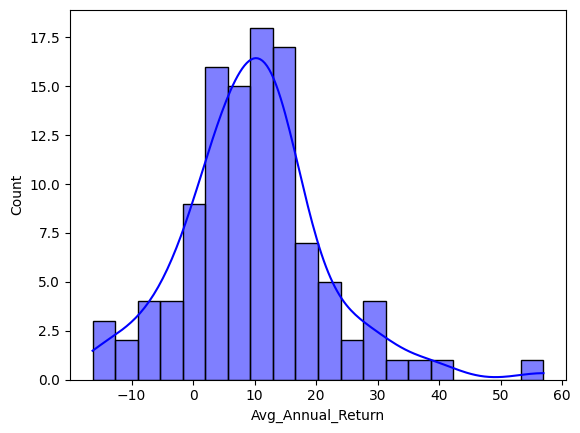

In [23]:
sns.histplot(index_compositions['Avg_Annual_Return'], kde=True, bins=20, color="blue")
plt.savefig("../figures/average_return.png", dpi=300, bbox_inches='tight')

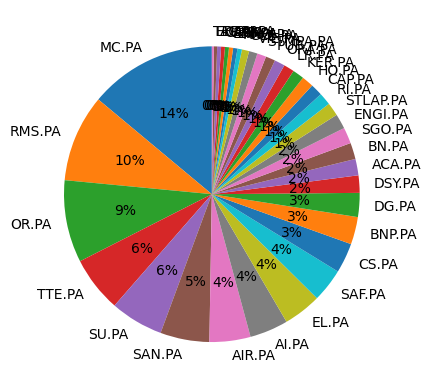

In [95]:
data=index_compositions[index_compositions["Index_Shortname"]=="CAC 40"]
data = data.dropna()
data.sort_values(by="Market_Cap", ascending=False, inplace=True)
plt.pie(data["Market_Cap"], labels=data["Ticker"], autopct='%1.0f%%', startangle=90)
plt.savefig("../figures/market_cap.png", dpi=300, bbox_inches='tight')

In [28]:
index_compositions[["Avg_Annual_Return"]].describe().round(2)

,Avg_Annual_Return
count,110.00
mean,9.88
std,11.44
min,-16.33
25%,3.62
50%,10.10
75%,14.54
max,56.98


In [31]:
company_details.head()

,Index_Shortname,Ticker,Company_Name,Industry,Sector,Address,Num_Employees,Website
0,CAC 40,AC.PA,Accor SA,Lodging,Consumer Cyclical,"82, rue Henri Farman, Issy-les-Moulineaux",19198.0,https://www.group.accor.com/en
1,CAC 40,ACA.PA,Credit Agricole S.A.,Banks - Regional,Financial Services,"12 place des Etats-Unis, Montrouge",78823.0,https://www.credit-agricole.com
2,CAC 40,AI.PA,L'Air Liquide S.A.,Specialty Chemicals,Basic Materials,"75 quai d'Orsay, Paris",66300.0,https://www.airliquide.com
3,CAC 40,AIR.PA,Airbus SE,Aerospace & Defense,Industrials,"Mendelweg 30, Leiden",154581.0,https://www.airbus.com
4,CAC 40,BN.PA,Danone S.A.,Packaged Foods,Consumer Defensive,"17, Boulevard Haussmann, Paris",88843.0,https://www.danone.com


In [140]:
merge = pd.merge(company_details, index_compositions, on='Ticker')

In [141]:
merge['Market_Cap_log'] = np.log(merge['Market_Cap'])
merge['Num_Employees_log'] = np.log(merge['Num_Employees'])

<Axes: xlabel='Market_Cap_log', ylabel='Num_Employees_log'>

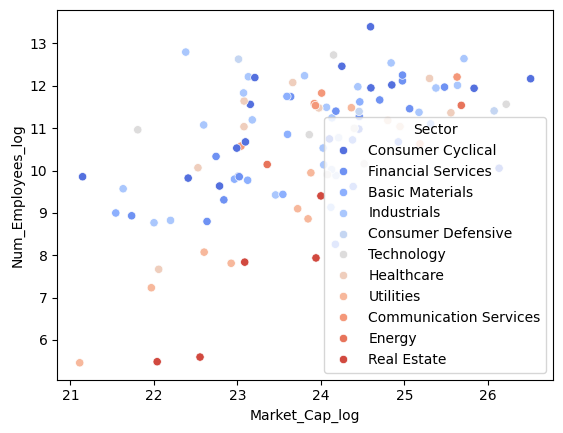

In [142]:
sns.scatterplot(x='Market_Cap_log', y='Num_Employees_log', hue='Sector', data=merge, palette='coolwarm')

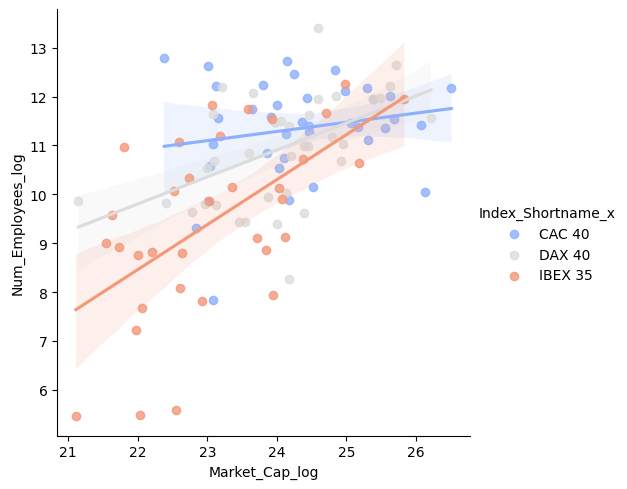

In [144]:
sns.lmplot(x='Market_Cap_log', y='Num_Employees_log', hue='Index_Shortname_x', data=merge, palette='coolwarm')
plt.savefig("../figures/market_cap_num_employees.png", dpi=300, bbox_inches='tight')

<Axes: xlabel='Market_Cap_log', ylabel='Num_Employees_log'>

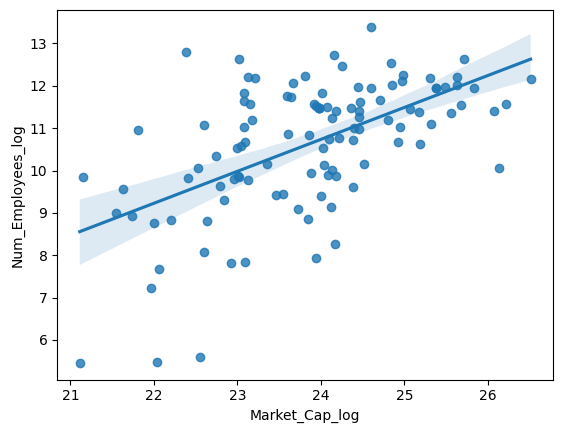

In [129]:
sns.regplot(x='Market_Cap_log', y='Num_Employees_log', data=merge, order=1)

In [133]:
merge = pd.merge(company_details, financial_statements, on='Ticker')

In [45]:
company_details["Sector"].value_counts().head()

Sector
Industrials           22
Financial Services    17
Consumer Cyclical     17
Healthcare            11
Utilities              9
Name: count, dtype: int64

In [44]:
company_details[company_details["Index_Shortname"]=="CAC 40"]["Sector"].value_counts().head()

Sector
Industrials               10
Consumer Cyclical          6
Financial Services         5
Consumer Defensive         4
Communication Services     3
Name: count, dtype: int64

In [46]:
company_details[company_details["Index_Shortname"]=="DAX 40"]["Sector"].value_counts().head()

Sector
Consumer Cyclical     10
Healthcare             6
Basic Materials        5
Financial Services     5
Industrials            4
Name: count, dtype: int64

In [48]:
company_details[company_details["Index_Shortname"]=="IBEX 35"]["Sector"].value_counts().head()

Sector
Industrials           8
Financial Services    7
Utilities             7
Real Estate           3
Basic Materials       2
Name: count, dtype: int64

In [107]:
company_details

,Index_Shortname,Ticker,Company_Name,Industry,Sector,Address,Num_Employees,Website
0,CAC 40,AC.PA,Accor SA,Lodging,Consumer Cyclical,"82, rue Henri Farman, Issy-les-Moulineaux",19198.0,https://www.group.accor.com/en
1,CAC 40,ACA.PA,Credit Agricole S.A.,Banks - Regional,Financial Services,"12 place des Etats-Unis, Montrouge",78823.0,https://www.credit-agricole.com
2,CAC 40,AI.PA,L'Air Liquide S.A.,Specialty Chemicals,Basic Materials,"75 quai d'Orsay, Paris",66300.0,https://www.airliquide.com
3,CAC 40,AIR.PA,Airbus SE,Aerospace & Defense,Industrials,"Mendelweg 30, Leiden",154581.0,https://www.airbus.com
4,CAC 40,BN.PA,Danone S.A.,Packaged Foods,Consumer Defensive,"17, Boulevard Haussmann, Paris",88843.0,https://www.danone.com
...,...,...,...,...,...,...,...,...
110,IBEX 35,SAN.MC,"Banco Santander, S.A.",Banks - Diversified,Financial Services,"Santander Group City, Madrid",209553.0,https://www.santander.com
111,IBEX 35,SCYR.MC,"Sacyr, S.A.",Engineering & Construction,Industrials,"Calle Condesa de Venadito, 7, Madrid",14314.0,https://www.sacyr.com
112,IBEX 35,SLR.MC,"Solaria Energa y Medio Ambiente, S.A.",Utilities - Renewable,Utilities,"Calle Princesa, 2 | 3 Planta, Madrid",235.0,https://www.solariaenergia.com
113,IBEX 35,TEF.MC,"Telefnica, S.A.",Telecom Services,Communication Services,"Distrito TelefOnica, Madrid",102090.0,https://www.telefonica.com


In [49]:
financial_statements

,Ticker,Financial_Statements,Details,Year,Value
0,AC.PA,Income Statement,Total Revenue,2023,5.056000e+09
1,AC.PA,Income Statement,Gross Profit,2023,2.554000e+09
2,AC.PA,Income Statement,Operating Income,2023,7.240000e+08
3,AC.PA,Income Statement,Net Income,2023,6.330000e+08
4,AC.PA,Income Statement,Diluted EPS,2023,2.220000e+00
...,...,...,...,...,...
6007,UNI.MC,Cash Flow,Free Cash Flow,2021,1.392707e+10
6008,UNI.MC,Cash Flow,Operating Cash Flow,2020,2.027910e+09
6009,UNI.MC,Cash Flow,Investing Cash Flow,2020,1.031680e+08
6010,UNI.MC,Cash Flow,Financing Cash Flow,2020,-2.270400e+07


In [106]:
daily_stock_price.shape

(28527, 8)

In [137]:
daily_stock_price.Ticker.nunique()

110

In [90]:
ticker = "MC.PA"

[*********************100%***********************]  1 of 1 completed


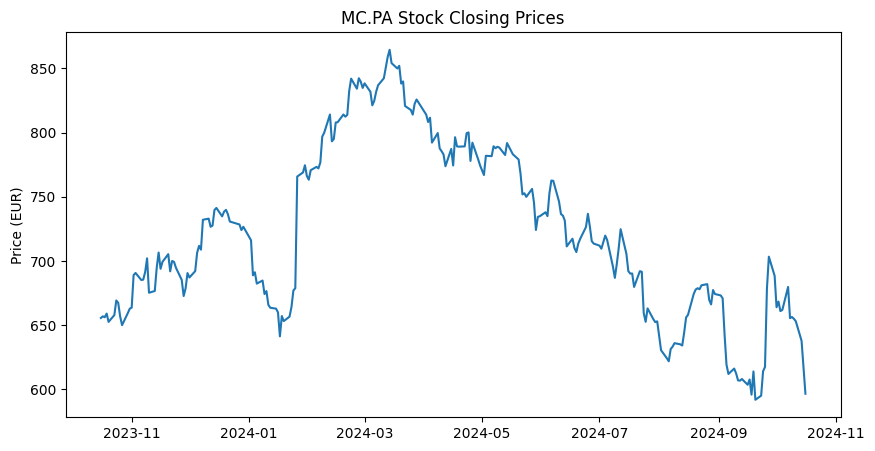

<Figure size 640x480 with 0 Axes>

In [99]:
data = yf.download(ticker, period='1y')
data.reset_index(inplace=True)
data = data[['Date','Adj Close']]

# Plot the historical prices
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Adj Close'])
plt.title(f'{ticker} Stock Closing Prices')
plt.ylabel('Price (EUR)')
plt.show()
plt.savefig("../figures/daily_stock_price_mcpa.jpg", dpi=300, bbox_inches='tight')

[*********************100%***********************]  1 of 1 completed


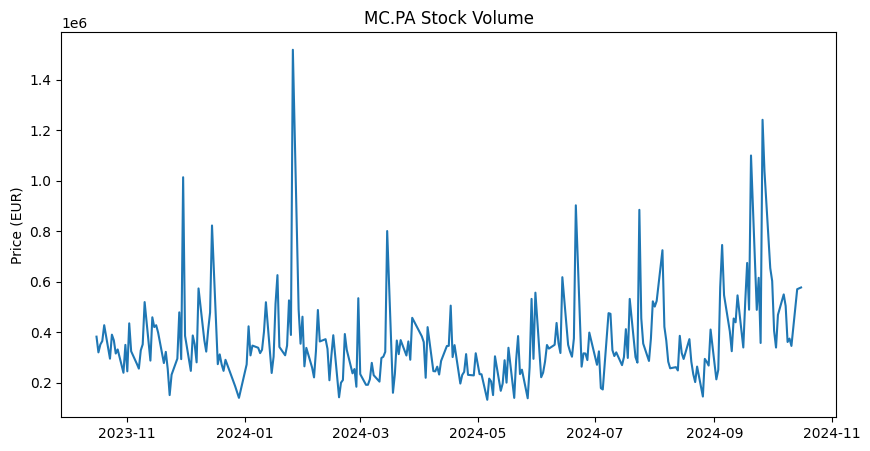

<Figure size 640x480 with 0 Axes>

In [102]:
data = yf.download(ticker, period='1y')
data.reset_index(inplace=True)
data = data[['Date','Volume']]

# Plot the historical prices
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Volume'])
plt.title(f'{ticker} Stock Volume')
plt.ylabel('Price (EUR)')
plt.show()
plt.savefig("../figures/daily_stock_volume_mcpa.jpg", dpi=300, bbox_inches='tight')